In [ ]:
import numpy as np
import torch

charges = {'HIS': 1, 'ARG': 1, 'LYS': 1,
           'ASP': -1, 'GLU': -1,  # carboxylate
           'CYS': 0, 'CYS': 0}   # thiol and phenol prot
prot = charges.keys()

Rs, solvents = {}, {}
counter = 0

with open("/home/jrhoernschemeyer/Desktop/thesis/PDB/107m-red.pdb", "r") as f:
    resis = {}
    xs = []
    for line in f:
        L = line.split()

        if line.startswith("ATOM"):
            resname, atomname = L[3], L[2]
            if resname in prot:
                resname = resname + str(L[5])

                if resname in resis:
                    resis[resname][f"{atomname} {counter}"] = (float(L[6]), float(L[7]), float(L[8]))
                    counter += 1
                else:
                    resis[resname] = {f"{atomname} {counter}": (float(L[6]), float(L[7]), float(L[8]))}
                    counter += 1

            else:  # resname in noprot
                resname, atomname, resnum = L[3], L[2], L[5]
                xs.append((float(L[6]), float(L[7]), float(L[8])))
                counter += 1

        elif line.startswith("HETATM"):
            resname = L[3] + str(L[5])
            atomname = L[2]
            if resname in solvents:
                solvents[resname][f"{atomname} {str(counter)}"] = (float(L[6]), float(L[7]), float(L[8]))
                counter += 1
            else:
                solvents[resname] = {f"{atomname} {str(counter)}": (float(L[6]), float(L[7]), float(L[8]))}
            counter += 1

all_ppos, all_pspecies = {}, {}
positions = []
resi_keys=tuple(resis.keys())

pspecies={}
for res in resi_keys:
    pspecies, Rs = {},{}
    residict = resis[res]
    for atom, pos in residict.items():
        node = atom.split()  # name, pos
        #rint(node)
        nodei = int(node[1])
        pspecies.update({node[0] : nodei})
        #rint(nodei)
        #print(i)
        #i += 1
        #rint({node[0] : nodei}, pos)
        Rs[nodei] = pos


    all_ppos[res] = Rs  # ({res: {node[1]: pos}})
    all_pspecies[res] = pspecies




cations = {'HIS': ("HD1", "HD2", "HE1", "HE2"),
        'ASP':None,
        "LYS":("HZ1", "HZ2","HZ3"),
        "TYR":"HH",
        "GLU":None,
        "CYS":'HG',
        "ARG": ("HE11","HE12", "HE21", "HE22"),
        "THR":"HG1",
        "SER":"HG",
        "TRP":"HE1"}


anions = {"HIS":("ND1", "ND2"),
          "ASP":("OD1","OD2"),
          "LYS":"NZ",
          "TYR":"OH",
          "GLU":("OE1", "OE2"),
          "CYS":"SG",
          "ARG": ("NE1","NE2"),
          "THR":"OG1",
          "SER":"OG",
          "TRP":"NE1"}


s={}
all_ions={}
for key in resi_keys:
    
    resname = key[:3]
    species = all_pspecies[key]
    ion = torch.zeros(len(species))


    counter1, counter2 =0, 0
    species_map={}
    for k, v in species.items():
        
        element = k[0]
        #print(element)
        if element not in species_map:
            species_map[element] = counter1
            counter1 +=1
        species[k] = counter2
        counter2 += 1

         



    #todoooooooooo vals is broken

        
    cats =cations[resname]
    if cats:
        cs = [c for c in cats if c is not None]
        cats =[species.get(a) for a in cs]
        cs = [c for c in cats if c is not None]
        ion[cs] = 1


    ans = [species.get(a) for a in anions[resname]]
    ion[ans]  =-1
    
    all_ions[key] = ion

    feats = np.where(np.array(list(species.keys())) == species_map['H'], torch.tensor(1), torch.tensor(0))
    #feats = torch.tensor(feats).unsqueeze(0)


#turn species into numbers
#get pos tensor

els = list(species.keys())
es = [a[0] for a in els]

final=[]
#f#eats = np.where(np.array(es) == species_map['H'], torch.tensor(1), torch.tensor(0))
#feats
fs = [a for a in es if a == "H"]
for a in es:
    if a=="H":
        final.append(1)
    else:
        final.append(0)

Hs = torch.tensor(final)



/home/jrhoernschemeyer/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jrhoernschemeyer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [44]:
els = list(species.keys())
es = [a[0] for a in els]

final=[]
#f#eats = np.where(np.array(es) == species_map['H'], torch.tensor(1), torch.tensor(0))
#feats
fs = [a for a in es if a == "H"]
for a in es:
    if a=="H":
        final.append(1)
    else:
        final.append(0)

Hs = torch.tensor(final)

0: L = 0.414278119802475
1: L = 0.402957558631897
2: L = 0.39169538021087646
3: L = 0.3804679214954376
4: L = 0.3692869246006012
5: L = 0.3581171929836273
6: L = 0.3465420603752136
7: L = 0.3346112370491028
8: L = 0.3222740590572357
9: L = 0.30946406722068787
10: L = 0.2961791157722473
11: L = 0.28235378861427307
12: L = 0.2684745788574219
13: L = 0.25498461723327637
14: L = 0.24252238869667053
15: L = 0.2307017296552658
16: L = 0.22021856904029846
17: L = 0.21131451427936554
18: L = 0.20339837670326233
19: L = 0.1968497782945633
20: L = 0.19077634811401367
21: L = 0.18517476320266724
22: L = 0.18013720214366913
23: L = 0.175526425242424
24: L = 0.17120014131069183
25: L = 0.16715063154697418
26: L = 0.163397878408432
27: L = 0.15989769995212555
28: L = 0.15654407441616058
29: L = 0.1532164216041565
30: L = 0.14979620277881622
31: L = 0.14619025588035583
32: L = 0.14236870408058167
33: L = 0.13837118446826935
34: L = 0.1342834234237671
35: L = 0.1302102953195572
36: L = 0.1262502521276

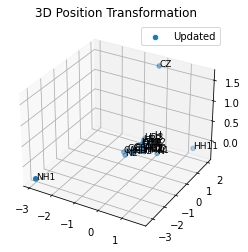

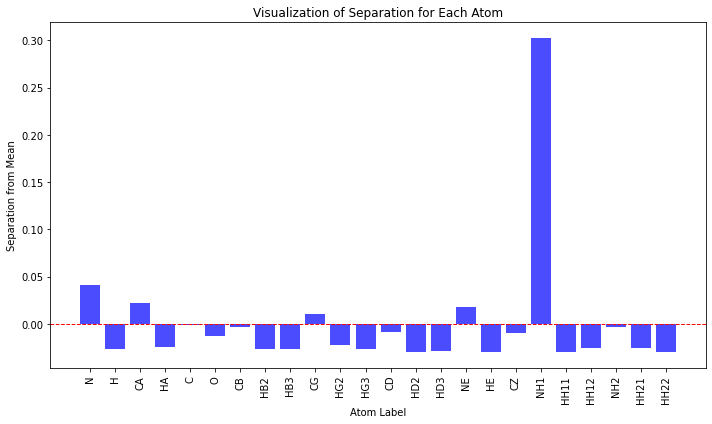

[(0.8097866, 'N'),
 (1.1447449, 'H'),
 (-0.9520141, 'CA'),
 (0.6476433, 'HA'),
 (-0.32491314, 'C'),
 (0.21956146, 'O'),
 (-0.34977928, 'CB'),
 (0.18966673, 'HB2'),
 (0.43419194, 'HB3'),
 (-0.6891382, 'CG'),
 (0.22017357, 'HG2'),
 (0.23543024, 'HG3'),
 (-0.39502513, 'CD'),
 (0.19465296, 'HD2'),
 (0.5303908, 'HD3'),
 (-0.9659475, 'NE'),
 (0.6610196, 'HE'),
 (3.3452148, 'CZ'),
 (-6.4621077, 'NH1'),
 (2.9270723, 'HH11'),
 (0.22479928, 'HH12'),
 (-0.4765041, 'NH2'),
 (0.15887126, 'HH21'),
 (0.044167135, 'HH22')]

In [ ]:


import torch
from egnn_pytorch import EGNN_Network

import torch.nn as nn
import numpy as np
import random
import torch.nn.functional as F
import itertools

def contrastive_loss(latent_features, species, margin):
    loss = 0.0

    positive_pairs = [(i, j) for i, j in itertools.combinations(range(len(species)), 2) if species[i] == species[j]]
    negative_pairs = [(i, j) for i, j in itertools.combinations(range(3), 2) if species[i] != species[j]]


    # Positive pairs
    for i, j in positive_pairs:
        z_i, z_j = latent_features[i], latent_features[j]
        dist = torch.norm(z_i - z_j, p=2)  # Euclidean distance
        loss += dist ** 2  # Minimize distance for positive pairs

    # Negative pairs
    for i, j in negative_pairs:
        z_i, z_j = latent_features[i], latent_features[j]
        dist = torch.norm(z_i - z_j, p=2)
        loss += torch.clamp(margin - dist, min=0) ** 2  # Enforce margin



    return loss / (len(positive_pairs) + len(negative_pairs))

#lr=0.01, weight_decay=1e-3)

def model(num_nodes, num_nearest_neighbors, dim, depth, lr, weight_decay):
    net = EGNN_Network(
        num_tokens = 100, #vocabulary siye, number of unique species
        num_positions = num_nodes,  #number of nodes         # unless what you are passing in is an unordered set, set this to the maximum sequence length
        dim = dim,# #internal rep size. c has square dependence. richer rep but overfitting for small d.s.
        depth = depth, #number of layers #deeper need more memort to store intermediate reps
        num_nearest_neighbors = num_nearest_neighbors, #number of nearest neighbors to consider #make this the max hood size
        coor_weights_clamp_value = 2.   # absolute clamped value for the coordinate weights, needed if you increase the num neareest neighbors
    )

    optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)
    return net, optimizer

#optimizer = torch.optim.Adam(net.parameters(), lr, weight_decay)


def loop(nepochs, coors, species, ion_labels, model, optimizer, loss_margin, negative_slope):
    seed = 42
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    #els = list(species.keys())
    es = [a[0] for a in species]

    final=[]
    for a in es:
        if a=="H":
            final.append(1)
        else:
            final.append(0)

    Hs = torch.tensor(final)

    for epoch in range(nepochs):
        optimizer.zero_grad()
        
        

        
        #loss = contrastive_loss(latent_features, species, margin=3)

        # Backward pass
        #loss.backward()
        #optimizer.step()

        
        
        #print(f"Epoch {epoch}: Loss = {loss.item()}")
        #print(coors_out, feats_out)
        


        ####
        
        species = torch.ones(len(species), dtype=int)
        #print(len(species), Hs)
        x, coors_out = model(Hs.unsqueeze(0), coors.unsqueeze(0))
        #featss_ = F.softmax((nn.LeakyReLU(negative_slope=negative_slope)(featsss_)), dim=1)  # Sum along dim=1 will be 1   #need dim1  #featss_ = nn.Tanh()(nn.ReLU()(featsss_))
        out = nn.LeakyReLU(negative_slope=0.neg)(x)
    
        y = out / out.max()  #oit needsthis
        # Compute loss
        latent_feature = y[0]  
        L = contrastive_loss(latent_feature, ion_labels, loss_margin)
        L.backward()
        optimizer.step()
        #scheduler.step()
        print(f"{epoch}: L = {L.item()}")

    return latent_feature


coords = torch.tensor(list(all_ppos['ARG32'].values()))
species = (list(all_pspecies["ARG32"]))
#(num_nodes, num_nearest_neighbors, dim, depth, lr, weight_decay)
net, optimizer = model(len(species), 1, 3, 2, .01, .001) #num neighbors, dim, depth, lr, weight decay






x = loop(100, coords, species, all_ions["ARG32"], net, optimizer, 0, 1) #margin, negative slope

from matplotlib import pyplot as plt

def plot(x):
    out = torch.mean(x, dim=1)

    f = out.unsqueeze(0).detach().numpy()*coords.detach().numpy().T
    combined = np.column_stack(f).flatten()
    combined.reshape(-1, 3)
    def divergence(field):
        "return the divergence of a n-D field"
        return np.gradient(np.gradient(field))

    D=divergence(combined).reshape(-1,3)
    print(out.sum()/len(species))
    print(len(species))
    #print([np.sum(d) for d in D])

    #list(species.keys())
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(D[:, 0], D[:, 1], D[:, 2], label="Updated")

    # Add labels to points
    for i in range(len(D)):
        ax.text(D[i, 0], D[i, 1], D[i, 2], species[i], fontsize=9)

    plt.legend()
    plt.title("3D Position Transformation")
    plt.show()

    import pandas as pd 

    r = [[float(v), s] for v,s in zip(out, species)]

    df = pd.DataFrame(r, columns=["Value", "Label"])

    # Calculate the mean of the column
    mean_value = df["Value"].mean()

    # Calculate separation from the mean
    df["Separation"] = df["Value"] - mean_value

    # Plot separation
    plt.figure(figsize=(10, 6))
    plt.bar(df["Label"], df["Separation"], color='blue', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.xlabel("Atom Label")
    plt.ylabel("Separation from Mean")
    plt.title("Visualization of Separation for Each Atom")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return [(np.sum(d), s) for d, s in zip(D,species)]

plot(x)
#bigger w.d. prevents overfditting, regulariyation
#margin: a bigger margin makes itconverge slower and doesnt change the initial loss
#margin of 5 made it suffer. converges slow and it cant put the hh on the last axis. 
#but it brings together more the N and the H in raw values.

#weight decay of .1 is actually what made me lose the third dim
#weight decay of .1 is actually what made me lose the third dim
#1e-4 fir beg slope made it almost go to 1 and way more grainy but i lost the o vs
#neg slope .01 makes lower loss and raises H node, and .97. .1 makes it so its .9 and higher loss,
#prolly means lessss overfitting. .1 looks good numbers wise
#still very sensitive to the lr. needs .01
#putting dim up to 3doesnt change the values scores much and can see a backbone mor ebut
#discrimates less well. dim to 4 totallz fails
#dim3 depth 3 means it loses tje backbonesc structure.
#negative slope to one makes really good clustering and significance to N not H.
#and then it doesnt care about the summed charge anymore lmao. and higher loss is higher again. end .07
#oh wait forgot to take divergence x2. but very sensitive to neg slope.
#adding depth doesnt change platau loss .08

#it is sensitive to too many epochs

#it works but not as well when just put in 1s
#it cares about number of tokens?? need 100
#normalliying lowers loss but worsens it. destroys it even
#tanh ruins it
#you can really tell its in some model complexity when it can find the hh and N without even the softmax but otherwise looks bad. better lposs tho

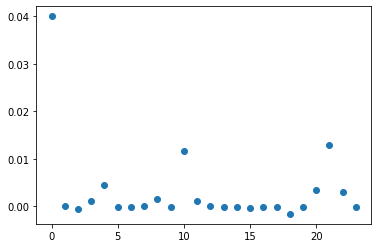

In [121]:
plt.plot(x[:,1].detach().numpy(), "o")

In [9]:
resis

{'GLU5': {'N 65': (32.083, 18.734, -13.377),
  'H 66': (31.922, 18.521, -14.362),
  'CA 67': (33.434, 19.179, -13.046),
  'HA 68': (33.892, 18.351, -12.506),
  'C 69': (33.342, 20.423, -12.173),
  'O 70': (34.207, 20.665, -11.338),
  'CB 71': (34.229, 19.495, -14.325),
  'HB2 72': (34.352, 18.674, -15.032),
  'HB3 73': (33.732, 20.199, -14.992),
  'CG 74': (35.619, 20.101, -14.102),
  'HG2 75': (35.669, 21.173, -13.909),
  'HG3 76': (36.103, 20.067, -15.078),
  'CD 77': (36.581, 19.159, -13.391),
  'OE1 78': (36.457, 17.927, -13.539),
  'OE2 79': (37.482, 19.653, -12.694)},
 'GLU7': {'N 87': (31.046, 21.055, -9.924),
  'H 88': (30.393, 21.019, -10.707),
  'CA 89': (30.696, 20.611, -8.577),
  'HA 90': (30.38, 21.559, -8.141),
  'C 91': (31.914, 20.022, -7.85),
  'O 92': (32.126, 20.298, -6.675),
  'CB 93': (29.535, 19.621, -8.632),
  'HB2 94': (29.307, 19.197, -7.654),
  'HB3 95': (29.811, 18.86, -9.361),
  'CG 96': (28.225, 20.287, -9.059),
  'HG2 97': (27.986, 20.892, -9.933),
  'HG3 

In [119]:
x

tensor([[ 1.5385e-01,  3.9990e-02, -3.1561e-04],
        [-1.8077e-05, -1.1227e-05, -6.4370e-04],
        [ 1.3952e-01, -6.0907e-04,  1.3309e-02],
        [ 1.5216e-02,  1.0420e-03, -6.2255e-04],
        [ 7.6992e-02,  4.5863e-03, -5.0149e-04],
        [ 5.3462e-02, -9.5030e-05, -2.1531e-04],
        [ 7.7263e-02, -8.7211e-05, -8.3135e-05],
        [-4.2190e-04, -1.7243e-06, -6.0390e-04],
        [-4.4097e-04,  1.5114e-03, -2.8401e-04],
        [ 9.0591e-02, -1.0220e-04,  1.2747e-02],
        [-4.2215e-04,  1.1647e-02, -6.0506e-04],
        [-6.2837e-04,  1.0755e-03, -2.8551e-04],
        [ 5.7790e-02, -2.1276e-05, -1.9414e-04],
        [-5.7990e-04, -1.6246e-04, -5.9918e-04],
        [ 3.7334e-03, -8.1569e-05, -2.5178e-04],
        [ 1.4201e-01, -2.6323e-04, -4.1156e-04],
        [-4.3115e-04, -2.0510e-04, -5.4500e-04],
        [ 6.4781e-02, -9.8809e-05, -2.5175e-04],
        [ 1.0000e+00, -1.5935e-03, -6.2577e-04],
        [-4.9799e-04, -1.6347e-04, -6.0046e-04],
        [-5.6621e-04